In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [9]:
df=pd.read_csv("Instagram.csv", encoding="latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [10]:
df.tail()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...


In [11]:
df.shape

(119, 13)

In [12]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [13]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [14]:
df.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


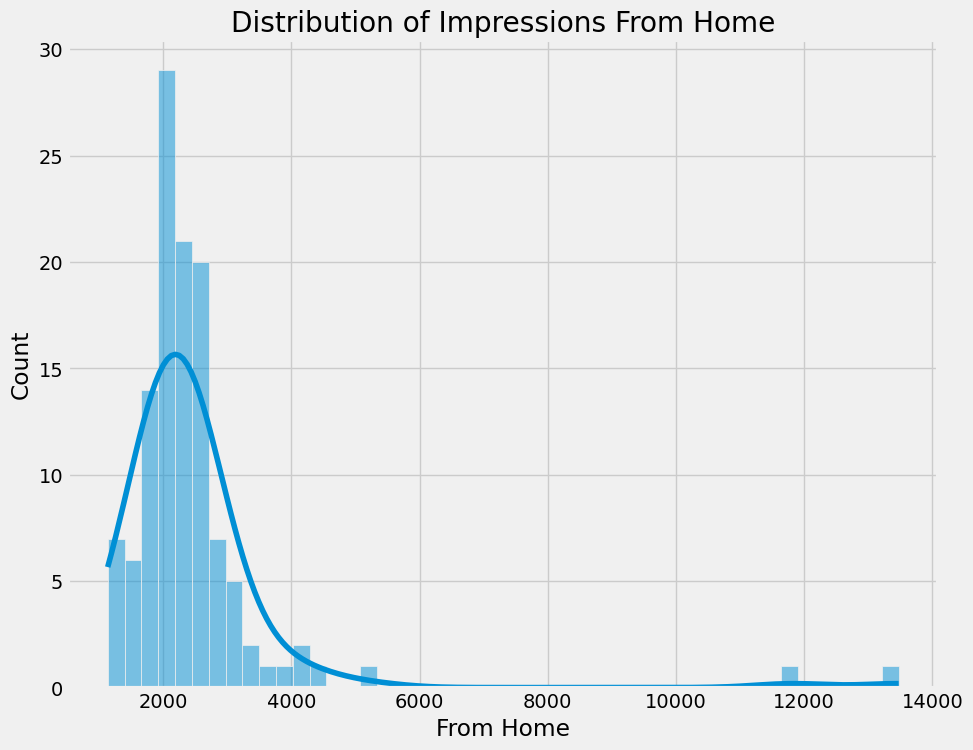

In [20]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(df['From Home'], kde=True)
plt.show()

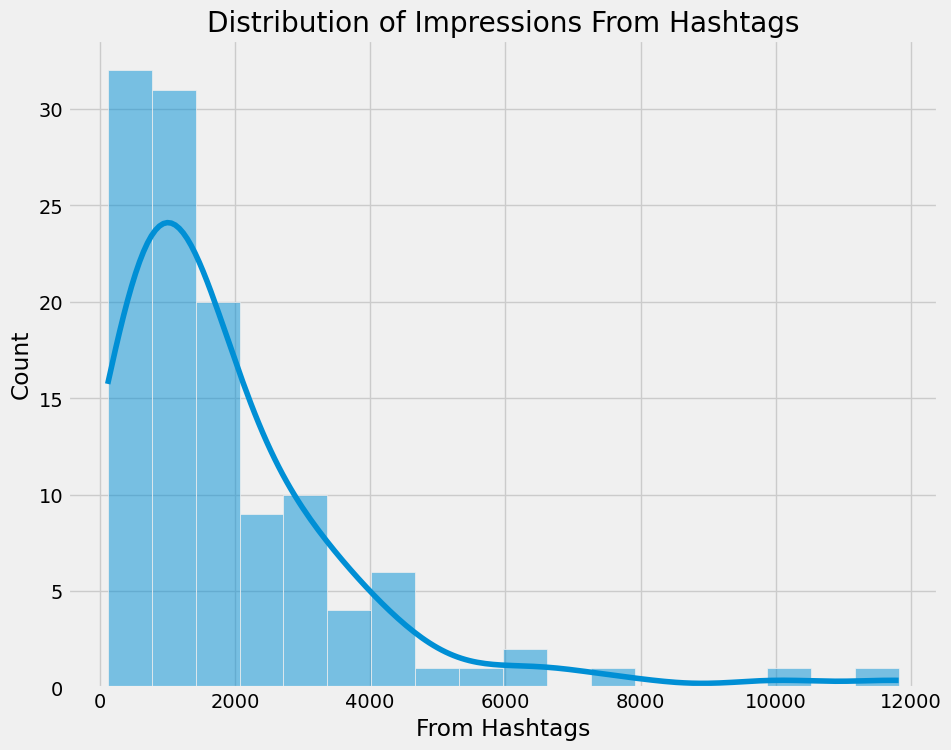

In [21]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(df['From Hashtags'], kde=True)
plt.show()

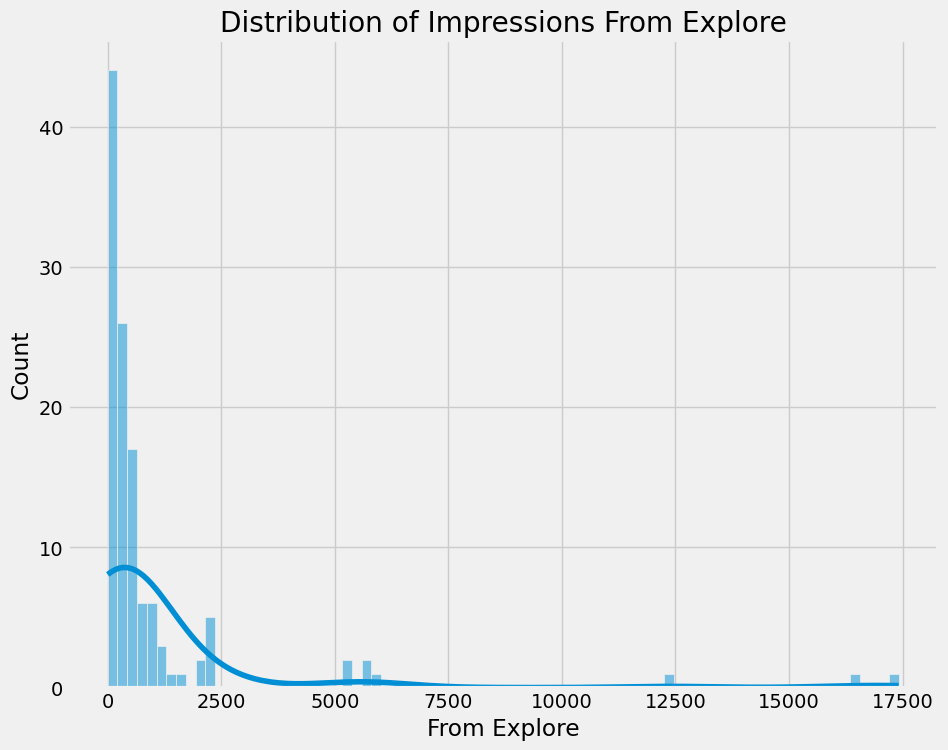

In [22]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(df['From Explore'], kde=True)
plt.show()